# Heteroskedasticity

In Gauss-Markov assumptions, we assume $u_i$ are independently and identically distributed. This assumption is used to derive the formula of the standard error of $\hat{\beta}$.

If $u_i$ are not identical, i.e. $u_i \sim N(0, \sigma_i^2)$ where $\sigma_i$ varies in i, we say that error terms are **heteroskedastic** and call the corresponding issue heteroskedasticity.

![hetero](./images/heteroskedasticity.jpeg)


Under heteroskedasticity, the variance covariance matrix of $\hat{\beta}$ is no longer equal to $\sigma^2(X^TX)^{-1}$. So all inferences that rely on the standard error of $\hat{\beta}$ - for example, t test and F test - would be invalid. 

The remedy, though, is also intuitive - find the right variance covariance matrix of $\hat{\beta}$. With $cov(\vec{\sigma},\vec{\sigma}) = \Omega$, 

$$cov(\hat\beta,\hat\beta) = (X^TX)^{-1}X^T\Omega X(X^TX)^{-1}$$

This is known as the heteroskedasticity-consistent (HC) standard errors or heteroskedasticity-robust standard errors (or simply robust standard errors).

In most cases $\Omega$ is unknown, therefore we need to estimate this matrix using the residuals $\hat{u_i}$. Different method used to the estimate this matrix leads to various version of robust standard errors.



Wooldridge (section 8.2) presents formulas for heteroskedasticity-robust standard errors. In **statsmodels**, an easy way to do these calculations is to make use of the argument cov_type in the method **fit**.  The argument **cov_type** can produce several refined versions of robust standard errors.

If the regression model obtained by **ols** is stored in the variable **reg**, the variance-covariance matrix can be calculated using

- **reg.fit(cov_type="nonrobust")** or **reg.fit()** for the default homoscedasticity-based standard errors.
- **reg.fit(cov_type="HC0")** for the calssical version of White's robust varaince-covariance matrix presented by Wooldridge (Equation 8.4 in Section 8.2)
- **reg.fit(cov_type="HC1")** for a version of White's robust variance-covariance matrix corrected by degrees of freedom.
- **reg.fit(cov_type="HC2")** for a version with a small sample correction. This is the default behavior of *Stata*.
- **reg.fit(cov_type="HC3")** for the refined version of White's robust variance-covariance matrix.

> In the exam, you an use any of these HC standard errors.

### Example

1. As an example, let's import the gpa3 dataset from wooldridge and regress cumgpa on sat.

2. In addition, we will use the **subset** argument to use only results from the spring term.

In [1]:
import wooldridge as woo

df = woo.data("gpa3")
df2 = df.loc[df["term"]==2]

In [2]:
import statsmodels.formula.api as smf
reg = smf.ols("cumgpa~sat",data=df2)
res = reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 cumgpa   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     92.02
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.41e-19
Time:                        11:16:23   Log-Likelihood:                -291.31
No. Observations:                 366   AIC:                             586.6
Df Residuals:                     364   BIC:                             594.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8919      0.153      5.831      0.000       0.591       1.193
sat            0.0016      0.000      9.593      0.000       0.001       0.002
==============================================================================
Omnibus:                       16.184   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.588
Skew:                          -0.354   Prob(JB):                     1.24e-05
Kurtosis:                       3.989   Cond. No.                     4.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- term: fall = 1, spring = 2
- sat: SAT score
- tothrs: total hours prior to term
- cumgpa: cumulative GPA
- season: =1 if in season
- frstsem: =1 if student's 1st semester
- crsgpa: weighted course GPA
- verbmath: verbal SAT to math SAT ratio
- trmgpa: term GPA
- hssize: size h.s. grad. class
- hsrank: rank in h.s. class
- id: student identifier
- spring: =1 if spring term
- female: =1 if female
- black: =1 if black
- white: =1 if white
- ctrmgpa: change in trmgpa
- ctothrs: change in total hours
- ccrsgpa: change in crsgpa
- ccrspop: change in crspop
- cseason: change in season
- hsperc: percentile in h.s.
- football: =1 if football player

3. Scatter plot cumulative gpa against sat, only use data from the spring terms.

4. Plot the regression line in the same graph

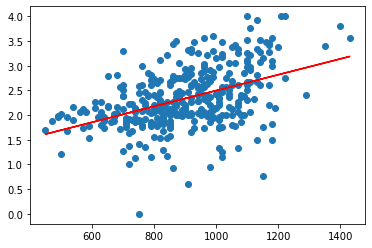

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df2["sat"],df2["cumgpa"])
plt.plot(df2["sat"],res.fittedvalues,c="r")
plt.show()

There is apparently heteroskedasticy. To obtain correct standard errors, Let's run another regression, but this time use HC2.

In [4]:
res.bse

Intercept    0.152949
sat          0.000167
dtype: float64

In [5]:
res_hc2 = reg.fit(cov_type="HC2")
res_hc2.bse
# print(res_hc2.summary())
# print(res.summary())

Intercept    0.144230
sat          0.000168
dtype: float64

5. Compare the coefficient from the two regressions, what do you find?

In [6]:
print(res.params)
print(res_hc2.params)

Intercept    0.891913
sat          0.001604
dtype: float64
Intercept    0.891913
sat          0.001604
dtype: float64


6. Compare the standard errors, what do you find?

In [7]:
print(res.bse)
print(res_hc2.bse)

Intercept    0.152949
sat          0.000167
dtype: float64
Intercept    0.144230
sat          0.000168
dtype: float64


In **most** cases, the robust standard error will be slightly higher than the nonrobust standard error. 

## 8.2 Heteroskedasticity Tests

When there is only one regressor, we can graphically display the heteroskedastic error terms. However, in multiple regression, a test statistic could be more useful.

The Breusch-Pagan (BP) test for heteroskedasticity is easy to implement with basic OLS routines. After a model

$$y = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k + u$$

is estimated, we obtain the residuals $\hat{u_i}$ for all observations $i=1,\dots, n$. We regress their squared value on all independent variables from the original equation. We can either look at the standard F test of overall significance printed for example by the **summary** method. Or we can use an LM test by multiplying the $R^2$ from the second regression with the number of observations. The null hypotheses of both tests are "there is no heteroskedasticity".

In **statsmodels**, this is done by **sm.stats.diagnostic.het_breuschpagan**. 

In [17]:
import statsmodels.api as sm
import patsy as pt

formula = "cumgpa ~ sat"
reg = smf.ols(formula, data=df2)
res = reg.fit()
y, X = pt.dmatrices(formula, data=df2)
bp_test = sm.stats.diagnostic.het_breuschpagan(res.resid, X)

#lm_stat nR2
print("lm_stat ",bp_test[0])

#lm_pval
print("lm_pval ",bp_test[1])
      
#F_stat 
print("f_stat ", bp_test[2])

#F_pval
print("f_pval ", bp_test[3]) 

lm_stat  13.352889009754154
lm_pval  0.0002580248238850462
f_stat  13.782763130831238
f_pval  0.00023733148100531514


Or we can do this manually.

In [18]:
from scipy import stats
df2 = df2.reset_index(drop=True)

# obtain u and u^2
df2["u2"] = res.resid**2

# regress u^2 on X
reg_bp = smf.ols("u2 ~ sat", data=df2)
res_bp = reg_bp.fit()

# LM = nR^2
lm_stat = res_bp.rsquared*len(df2)
print("lm_stat ", lm_stat )
print("lm_stat ", 1 - stats.chi2.cdf(lm_stat, 2)) #degrees of freedom = number of restrictions.


print("f_stat ", res_bp.fvalue)
print("f_pval ", res_bp.f_pvalue)

###############
# sometimes the numbers do not match, because u2 is too close to zero
###############

lm_stat  13.352889009754154
lm_stat  0.0012602508319221606
f_stat  13.782763130831238
f_pval  0.00023733148100531514


## 8.3 Weighted Least Squares

Weighted Least Squares (WLS) attempts to provide a more efficient alternative to OLS. If the functional form of heteroskedasticity is known, such that 
$$var(u_i|x_i) = \sigma^2 h(x_i)$$

we can divide both side of the specification by the square root of h(x).In other words, we apply a weight = $\frac{1}{\sqrt{h(x)}}$ to the estimation.

This can be done in **statsmodels** using the argument **weights** of the command **wls**. Note that you should supply 1/W to the **weights** parmeter, **wls** will automatically convert it to 1/sqrt(W).

Assume in the cumulative gpa example, we know that $var(u_i|x) = \sigma^2 sat$

In [10]:
# do not need to take the square root

reg_wls = smf.wls("cumgpa~sat", data=df2, weights=1/df2["sat"])
res_wls = reg_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                 cumgpa   R-squared:                       0.202
Model:                            WLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     91.88
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.49e-19
Time:                        11:16:23   Log-Likelihood:                -282.30
No. Observations:                 366   AIC:                             568.6
Df Residuals:                     364   BIC:                             576.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9775      0.139      7.042      0.0

In [11]:
print(res_wls.bse)
print(res.bse)

Intercept    0.138804
sat          0.000157
dtype: float64
Intercept    0.152949
sat          0.000167
dtype: float64


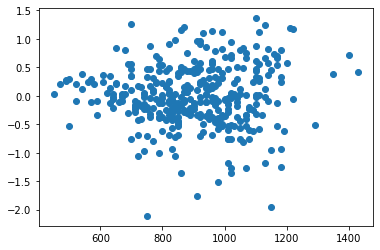

In [12]:
plt.scatter(x=df2["sat"],y=res_wls.resid)

# Exercise

Implement both OLS, Breusch-Pagan Test, OLS with HC2, WLS estimation for a regression of financial wealth (nettfa) on income (inc), age (age), gender (male) and eligibility for a pension plan (e401k) using the dataset **401ksubs**. We assume that the variance is proportional to the income variable inc. Therefore, `weights=1/df["inc"]`.

In [13]:
df = woo.data("401ksubs")
formula = "nettfa ~ inc + age + male + e401k"
reg = smf.ols(formula, data=df)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 nettfa   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     480.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:16:23   Log-Likelihood:                -50855.
No. Observations:                9275   AIC:                         1.017e+05
Df Residuals:                    9270   BIC:                         1.018e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -63.6162      2.681    -23.728      0.0

In [14]:
res_hc2 = reg.fit(cov_type="hc2")
print(res_hc2.summary())

                            OLS Regression Results                            
Dep. Variable:                 nettfa   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     125.2
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          3.02e-104
Time:                        11:16:23   Log-Likelihood:                -50855.
No. Observations:                9275   AIC:                         1.017e+05
Df Residuals:                    9270   BIC:                         1.018e+05
Df Model:                           4                                         
Covariance Type:                  hc2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -63.6162      3.748    -16.974      0.0

In [15]:
y,X = pt.dmatrices(formula, data=df)
sm.stats.diagnostic.het_breuschpagan(res.resid, X)

(193.53701731546187,
 9.208092185700945e-41,
 49.38874259398204,
 3.484720173293022e-41)

In [16]:
reg_wls = smf.wls(formula, data=df, weights=1/df["inc"])
print(reg_wls.fit().summary())

                            WLS Regression Results                            
Dep. Variable:                 nettfa   R-squared:                       0.140
Model:                            WLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     375.9
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.66e-300
Time:                        11:16:23   Log-Likelihood:                -48094.
No. Observations:                9275   AIC:                         9.620e+04
Df Residuals:                    9270   BIC:                         9.623e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.5236      1.796    -23.115      0.0